In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Charger le dataset FuelConsumption CO2
data = pd.read_csv("FuelConsumptionCO2.csv")
data


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


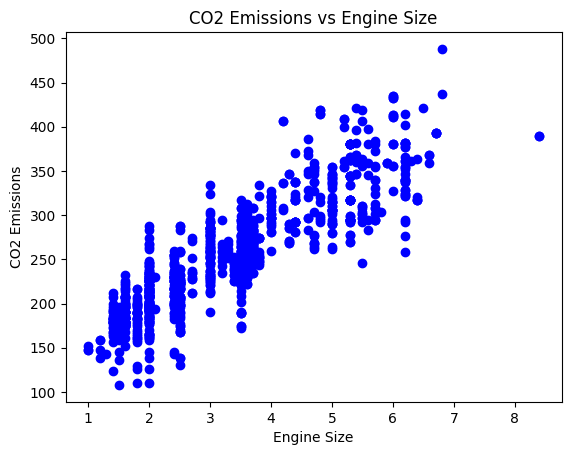

In [4]:
plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'], color='blue')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.title("CO2 Emissions vs Engine Size")
plt.show()

In [5]:
X = data[['ENGINESIZE']]  # Variable independante
y = data['CO2EMISSIONS']  # Variable dependante

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
print("Coefficient (Pente) :", model.coef_[0])
print("Ordonnee a l'origine (Intercept) :", model.intercept_)

Coefficient (Pente) : 38.992978724434074
Ordonnee a l'origine (Intercept) : 126.28970217408721


In [9]:
y_pred = model.predict(X_test)

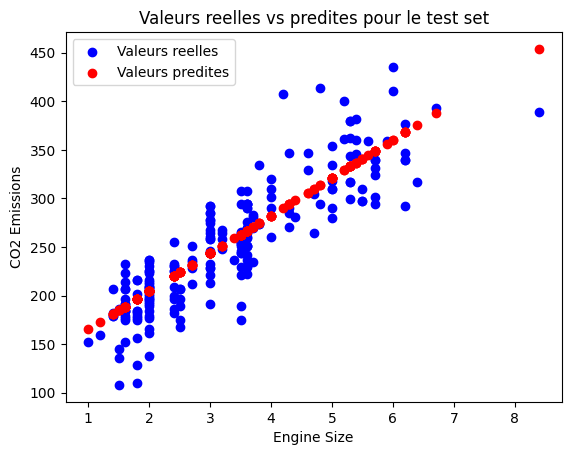

In [10]:
plt.scatter(X_test, y_test, color='blue', label='Valeurs reelles')
plt.scatter(X_test, y_pred, color='red', label='Valeurs predites')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.legend()
plt.title("Valeurs reelles vs predites pour le test set")
plt.show()

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE) :", mse)
print("Coefficient de determination (R^2) :", r2)

Mean Squared Error (MSE) : 985.9381692274999
Coefficient de determination (R^2) : 0.7615595731934373


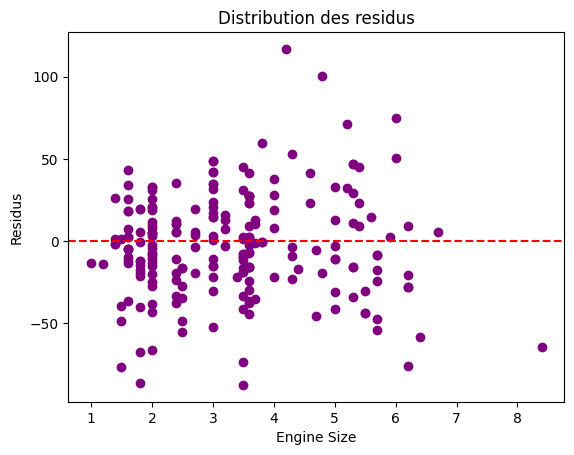

In [12]:
residuals = y_test - y_pred
plt.scatter(X_test, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Engine Size")
plt.ylabel("Residus")
plt.title("Distribution des residus")
plt.show()